In [25]:
import fastbook
fastbook.setup_book()

In [26]:
#hide
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.metrics import error_rate
from fastai.vision.data import ImageDataLoaders
from fastai.data.transforms import get_image_files

In [3]:
path = Path('./images/')
path.mkdir(parents=True, exist_ok=True)

In [4]:
fns = get_image_files(path)
fns

(#35887) [Path('images/angry/0.jpg'),Path('images/angry/1.jpg'),Path('images/angry/10.jpg'),Path('images/angry/10002.jpg'),Path('images/angry/10016.jpg'),Path('images/angry/10037.jpg'),Path('images/angry/10038.jpg'),Path('images/angry/10052.jpg'),Path('images/angry/10057.jpg'),Path('images/angry/10063.jpg')...]

In [5]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [6]:
faces = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = faces.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


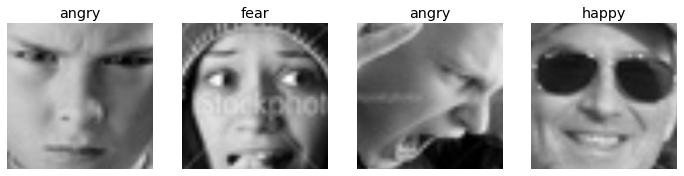

In [87]:
dls.valid.show_batch(max_n=4, nrows=1)

In [8]:
faces = faces.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = faces.dataloaders("./images/")


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\LBachmayr\miniconda3\envs\ai\lib\site-packages\torch\_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\LBachmayr/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:13<00:00, 3.52MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.829137,1.570039,0.600808,37:38


epoch,train_loss,valid_loss,error_rate,time
0,1.395807,1.212166,0.466630,28:38
1,1.171073,1.048416,0.399749,28:14
2,1.101310,0.984395,0.367702,25:10
3,1.029605,0.959007,0.358785,22:39


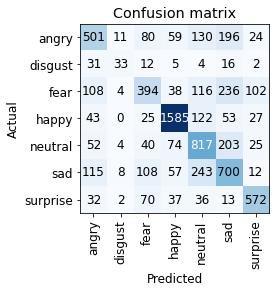

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [25]:
learn.export(os.path.abspath('./face_recognition_model.pkl'))

In [88]:
len = load_learner("./face_recognition_model.pkl",cpu=True,pickle_module=pickle)

In [89]:
btn_upload = widgets.FileUpload()

In [90]:
btn_run = widgets.Button(description='Classify')

In [91]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = len.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [92]:
VBox([widgets.Label('Select a Image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [93]:
len.predict(img)

('angry',
 tensor(0),
 tensor([0.3908, 0.0112, 0.1838, 0.0040, 0.1042, 0.2906, 0.0155]))